In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
import joblib
model = joblib.load('random_forest_model.joblib')

In [3]:
validation_data_inputs = pd.read_parquet('../encodedData/encoaded_validation_data_full.parquet')
validation_data_outputs = pd.read_parquet('../encodedData/Y_val.parquet')

In [6]:
validation_data_inputs = validation_data_inputs.reset_index(drop=True)
validation_data_outputs = validation_data_outputs.reset_index(drop=True)

In [7]:
validation_data_outputs

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
44995,0
44996,0
44997,0
44998,0


In [9]:
validation_data_inputs

,log_cc_num,amt,gender,lat,long,age,log_unix_time,merch_lat,merch_long,category_entertainment,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,35.809711,58.95,0,39.9934,-81.8024,58,21.021473,40.151822,-81.356923,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36.332385,32.94,0,36.9688,-78.5615,35,21.013369,36.674887,-79.090508,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42.877281,3.63,0,36.6659,-105.4694,32,21.032842,37.208969,-105.148792,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.559992,117.70,1,38.6476,-78.7717,58,21.035130,39.388381,-79.407702,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.087938,85.68,0,41.2496,-73.9446,61,21.038305,40.695765,-73.246817,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,35.810697,1.73,1,42.2470,-73.7552,22,21.013511,42.032352,-73.751354,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44996,36.089856,127.02,0,48.2777,-112.8456,48,21.017354,48.137227,-112.001055,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44997,36.332441,83.10,0,34.2853,-91.3336,27,21.007871,35.234829,-92.063643,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44998,35.810247,24.98,0,34.3795,-118.5230,49,21.020440,33.996140,-118.986791,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
predicted_values = model.predict(validation_data_inputs)

In [ ]:
accuracy = accuracy_score(validation_data_outputs,predicted_values)
print(accuracy)

0.9932888888888889


In [15]:
score = model.score(validation_data_inputs,validation_data_outputs['is_fraud'])
print(score)

0.9932888888888889


The model is highly effective at correctly identifying the majority class (negative cases, 44,698 True Negatives). However, it completely fails to identify any instances of the minority class (positive cases, 0 True Positives), mistakenly classifying all of them as negative (276 False Negatives).

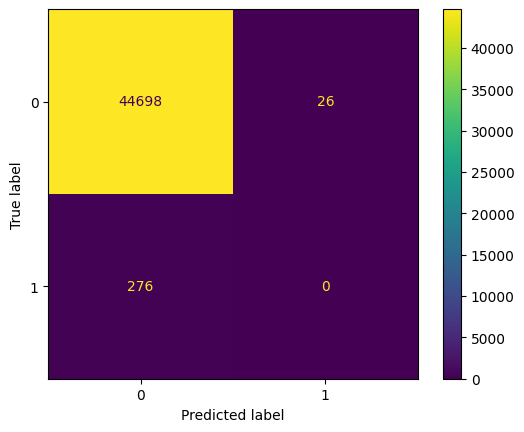

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(validation_data_outputs,predicted_values)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()
plt.show()

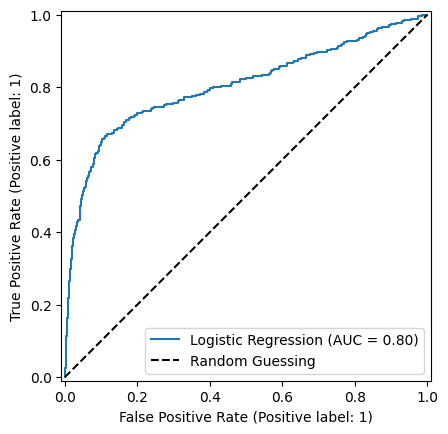

In [17]:
from sklearn.metrics import RocCurveDisplay
disp = RocCurveDisplay.from_estimator(model,validation_data_inputs,validation_data_outputs['is_fraud'], name="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.legend()
plt.show()